# **Predicting House Prices with Machine Learning**

### **Introduction**
In this project, we aim to tackle a classic and widely studied regression problem — predicting house prices based on various features of residential properties. We are using the ***House Prices - Advanced Regression Techniques*** dataset from Kaggle, which provides comprehensive information on houses in Ames, Iowa, including 79 explanatory variables describing every aspect of residential homes.

### **Objective**
The primary goal of this project is to build a robust machine learning model that can accurately predict the final sale price of a house.

This involves:

*Understanding and exploring the dataset through Exploratory Data Analysis (EDA).*

*Preprocessing the data, including handling missing values, encoding categorical variables, and feature scaling.*

*Building, evaluating, and comparing multiple machine learning models to identify the most effective approach.*

*Applying techniques to optimize model performance, such as hyperparameter tuning, regularization, and ensemble methods.*

This project not only showcases practical application of machine learning and data science workflows but also emphasizes the importance of thoughtful feature engineering and model evaluation in achieving reliable predictions.





## **Step 1: Importing Libraries**
Before diving into the analysis and modeling, it’s essential to import all the necessary libraries. Each library here serves a specific purpose in the data science workflow:

**pandas:** Used for handling and manipulating structured data. It provides DataFrame and Series objects for working with tabular data.

**numpy:** Useful for numerical operations, especially those involving arrays, matrices, and mathematical functions.

**matplotlib.pyplot:** A low-level plotting library to create static, interactive, and animated plots.

**seaborn:** Built on top of Matplotlib, this library makes it easier to create visually appealing statistical graphics and simplifies many tasks like plotting correlations, distributions, etc.

**train_test_split:** Splits the data into training and testing sets.

**GridSearchCV:** Used for hyperparameter tuning by exhaustively searching over a specified parameter grid.

**cross_val_score:** Performs cross-validation to evaluate model performance more reliably.

**StandardScaler:** Standardizes features by removing the mean and scaling to unit variance. This is important for models sensitive to feature scaling (like linear regression).

**SimpleImputer:** Used to fill in missing values with strategies like mean, median, or most frequent — an essential part of data cleaning.

**LinearRegression:** The basic linear regression model.

**Ridge and Lasso:** Regularized linear regression techniques that can help reduce overfitting and handle multicollinearity.

**RandomForestRegressor:** A powerful ensemble model that works well with both linear and non-linear data.

**mean_squared_error:** Measures the average squared difference between predicted and actual values. Lower values are better.

**r2_score:** Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. Closer to 1 indicates better model performance.

In [77]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Adjusting Display Options
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## **Step 2: Importing Data & Exploratory Data Analysis (EDA)**
Let’s start by importing the training data and converting it into a pandas DataFrame. Once loaded, we’ll take a quick look at the first few rows to ensure the data has been imported correctly and to get an initial sense of its structure.

In [78]:
# Importing Training Data
filepath = 'train.csv'

df = pd.read_csv(filepath)

print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

Next, we'll perform some basic exploratory data analysis to check the shape of the dataset and inspect the data types of each column. This helps us understand the structure and prepare for further preprocessing.

In [79]:
# EDA to confirm the shape of data, column names & data types

print(df.shape)
print(df.info())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

Our initial EDA shows that the data type of `MSSubClass` is numeric, which it shouldn't be. According to the *`data_description.txt`* file, this column represents the **type of dwelling**, making it a categorical feature. Therefore, let's convert it from numeric to string to reflect its true nature.

In [80]:
# Convert numerical column that are supposed to be categorical

df['MSSubClass'] = df['MSSubClass'].astype(str)

# Confirm the data type has been changed correctly
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Next, We will analyze distribution of the target variable  i.e `SalePrice`

Text(0.5, 1.0, 'Distribution of SalePrice')

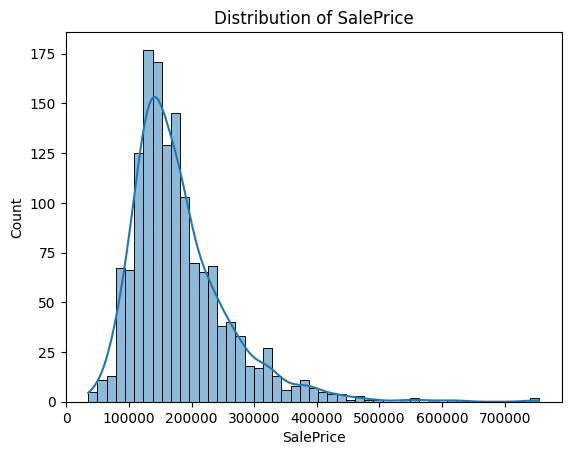

In [81]:
# Target Variable analysis
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")

The target variable was found to be **right skewed**. Machine learning models, especially linear models, perform better when the target variable is more normally distributed.

Therefore, we will apply **log transformation** to improve model performance.

We apply a `np.log1p(x)` log transformation that computes `log(1 + x)`, which safely handles zero or small values.

After the transformation, SalePrice becomes more symmetrical and bell-shaped, making it easier for the model to learn patterns.


Text(0.5, 1.0, 'Distribution of SalePrice')

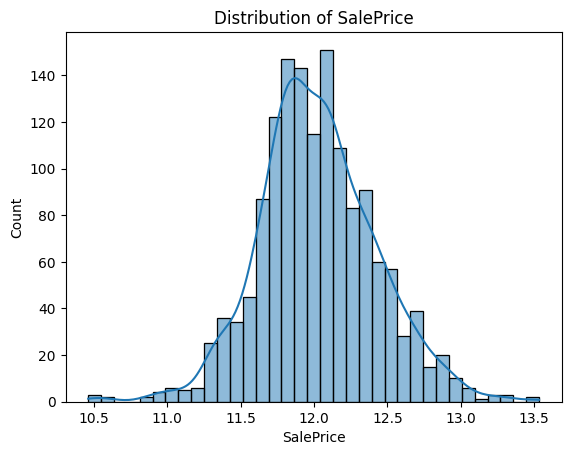

In [82]:
# Applying Log Transformation

df['SalePrice'] = np.log1p(df['SalePrice'])

sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")

Next, we examine the columns with missing values to understand the extent of missing data and determine how best to handle them during preprocessing.

In [83]:
# missing values handling

missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


We will handle missing values by imputing null values in categorical columns with "None" and in numerical columns with the median of that column

In [84]:
# Categorical columns (usually strings/objects)
categorical_cols = df.select_dtypes(include=['object']).columns

# Numerical columns (int or float)
numerical_cols = df.select_dtypes(exclude=['object']).columns

df[categorical_cols] = df[categorical_cols].fillna("None")

df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

Let's recheck to ensure there are no missing values remaining in our dataset

In [85]:
# recheck missing values

missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

Series([], dtype: int64)


## **Step 3: Feature Engineering**

Since `Id` is only an identifier for each row and doesn't provide any predictive value, it should be dropped to avoid noise in the model.

Additionally, we will select all the categorical columns and apply **one-hot encoding** to convert those categorical variables into binary columns.

In [86]:
# Feature Engineering

# Drop ID
df.drop(['Id'], axis=1, inplace=True)

# Encode categoricals
categorical = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical)


Next, we will **scale the features** so they have equal weight in model training. `StandardScaler ` standardizes the features converting their `mean` = `0` and `standard deviation` = `1`. Without scaling, features with larger variance could dominate and skew the model.

In [87]:
#Feature Scaling

# Separate features and target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Once preprocessing is complete, we will split the data into training and test set

In [88]:
# Train - Test Split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


to reduce repetitive the calculation, let's beuild a function to evaluate model performance

In [89]:
# Performance metric
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))




---



## **Step 4: Model Training & Evaluation**

### Linear Regression
Let's train our first model, **Linear Regression**



In [90]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# in dollars
y_test_dollars = np.expm1(y_test)
y_pred_lr_dollars = np.expm1(y_pred_lr)

print("Linear Regression RMSE:", rmse(y_test_dollars, y_pred_lr_dollars))
r2 = r2_score(y_test_dollars, y_pred_lr_dollars)
print("Linear Regression R2: ", r2)

Linear Regression RMSE: 23166.85773198375
Linear Regression R2:  0.9300286216417912




---



### Lasso Regression
Let's train our second model, **Lasso Regression**

To find the best alpha, we perform **hyperparameter tuning** using `GridSearchCV`

We will start by coarse tuning to search over a wide range of parameter values

In [91]:
# Define the parameter grid for alpha
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

# Create the Lasso model
lasso = Lasso()

# Perform GridSearchCV
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Hyper parameter tuning results
results = pd.DataFrame(grid_search.cv_results_)
results["mean_test_score"] = np.sqrt(-results["mean_test_score"])
print(results[['params', 'mean_test_score']])
print("Best alpha:", grid_search.best_params_['alpha'])

# Get the best model
best_lasso = grid_search.best_estimator_

# Predict and evaluate
y_pred_lasso = best_lasso.predict(X_test)
# in dollars
y_test_dollars = np.expm1(y_test)
y_pred_lasso_dollars = np.expm1(y_pred_lasso)

#model perfromance
rmse_model = rmse(y_test, y_pred_lasso)
r2_model = r2_score(y_test, y_pred_lasso)

# calculate performance in dollars
rmse_lasso = rmse(y_test_dollars, y_pred_lasso_dollars)
r2 = r2_score(y_test_dollars, y_pred_lasso_dollars)

# Model Performance Results in dollars
print("Lasso RMSE:", rmse_lasso)
print("Lasso R2:", r2)

# Model Performance Results
print("Lasso RMSE(model):", rmse_model)
print("Lasso R2(model):", r2_model)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.548e-02, tolerance: 1.428e-02
  model = cd_fast.enet_coordinate_descent(


              params  mean_test_score
0  {'alpha': 0.0001}         0.162896
1   {'alpha': 0.001}         0.153461
2    {'alpha': 0.01}         0.151238
3     {'alpha': 0.1}         0.222146
4       {'alpha': 1}         0.390941
5      {'alpha': 10}         0.390941
Best alpha: 0.01
Lasso RMSE: 24648.532726771093
Lasso R2: 0.9207921346274128
Lasso RMSE(model): 0.13793200252814802
Lasso R2(model): 0.8980486762045731


It appears that best parameter `alpha` is around `0.01`.

Next we will fine tune our model and zoom in around the promising values to find the best parameter value

In [92]:
# Define the parameter grid for alpha
param_grid = {
    'alpha': [0.005,0.01, 0.015, 0.02, 0.025, 0.03, 0.035]
}

# Create the Lasso model
lasso = Lasso()

# Perform GridSearchCV
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Hyper parameter tuning results
results = pd.DataFrame(grid_search.cv_results_)
results["mean_test_score"] = np.sqrt(-results["mean_test_score"])
print(results[['params', 'mean_test_score']])
print("Best alpha:", grid_search.best_params_['alpha'])

# Get the best model
best_lasso = grid_search.best_estimator_

# Predict and evaluate
y_pred_lasso = best_lasso.predict(X_test)
# in dollars
y_test_dollars = np.expm1(y_test)
y_pred_lasso_dollars = np.expm1(y_pred_lasso)

#model perfromance
rmse_model = rmse(y_test, y_pred_lasso)
r2_model = r2_score(y_test, y_pred_lasso)

# calculate performance in dollars
rmse_lasso = rmse(y_test_dollars, y_pred_lasso_dollars)
r2 = r2_score(y_test_dollars, y_pred_lasso_dollars)

# Model Performance Results in dollars
print("Lasso RMSE:", rmse_lasso)
print("Lasso R2:", r2)

# Model Performance Results
print("Lasso RMSE(model):", rmse_model)
print("Lasso R2(model):", r2_model)

             params  mean_test_score
0  {'alpha': 0.005}         0.149837
1   {'alpha': 0.01}         0.151238
2  {'alpha': 0.015}         0.155004
3   {'alpha': 0.02}         0.159338
4  {'alpha': 0.025}         0.163489
5   {'alpha': 0.03}         0.167505
6  {'alpha': 0.035}         0.171282
Best alpha: 0.005
Lasso RMSE: 22651.80077412642
Lasso R2: 0.9331053120231141
Lasso RMSE(model): 0.12709440194318752
Lasso R2(model): 0.9134403224192235


with hyperparameter tuning, we were successfully able to enhance model performance bringing RMSE from `$24,648` to `$22,651` and $R^2$ score from `0.920` to `0.933`



---



### Ridge Regression
Let's train our third model, **Ridge Regression**

We will start by coarse tuning to search over a wide range of parameter values

In [93]:
# Define the parameter grid for alpha
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}

# Create the Ridge model
ridge = Ridge()

# Perform GridSearchCV
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Hyper parameter tuning results
results = pd.DataFrame(grid_search.cv_results_)
results["mean_test_score"] = np.sqrt(-results["mean_test_score"])
print(results[['params', 'mean_test_score']])
print("Best alpha:", grid_search.best_params_['alpha'])

# Get the best model
best_ridge = grid_search.best_estimator_

# Predict and evaluate
y_pred_ridge = best_ridge.predict(X_test)
# in dollars
y_test_dollars = np.expm1(y_test)
y_pred_ridge_dollars = np.expm1(y_pred_ridge)

#model perfromance
rmse_model = rmse(y_test, y_pred_ridge)
r2_model = r2_score(y_test, y_pred_ridge)

# calculate performance in dollars
rmse_ridge = rmse(y_test_dollars, y_pred_ridge_dollars)
r2 = r2_score(y_test_dollars, y_pred_ridge_dollars)

# Model Performance Results in dollars
print("Ridge RMSE:", rmse_ridge)
print("Ridge R2:", r2)

# Model Performance Results
print("Ridge RMSE(model):", rmse_model)
print("Ridge R2(model):", r2_model)

             params  mean_test_score
0  {'alpha': 0.001}         0.152312
1   {'alpha': 0.01}         0.152729
2    {'alpha': 0.1}         0.156415
3      {'alpha': 1}         0.164399
4     {'alpha': 10}         0.162816
Best alpha: 0.001
Ridge RMSE: 23161.914172339402
Ridge R2: 0.9300584807430826
Ridge RMSE(model): 0.13624158012947876
Ridge R2(model): 0.9005322875328885


It appears that best parameter alpha is around 0.001.

Next we will fine tune our model and zoom in around the promising values to find the best parameter value

In [94]:
# Define the parameter grid for alpha
param_grid = {
    'alpha': [0.0005, 0.001, 0.0015, 0.002, 0.0025]
}

# Create the Ridge model
ridge = Ridge()

# Perform GridSearchCV
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Hyper parameter tuning results
results = pd.DataFrame(grid_search.cv_results_)
results["mean_test_score"] = np.sqrt(-results["mean_test_score"])
print(results[['params', 'mean_test_score']])
print("Best alpha:", grid_search.best_params_['alpha'])

# Get the best model
best_ridge = grid_search.best_estimator_

# Predict and evaluate
y_pred_ridge = best_ridge.predict(X_test)
# in dollars
y_test_dollars = np.expm1(y_test)
y_pred_ridge_dollars = np.expm1(y_pred_ridge)

#model perfromance
rmse_model = rmse(y_test, y_pred_ridge)
r2_model = r2_score(y_test, y_pred_ridge)

# calculate performance in dollars
rmse_ridge = rmse(y_test_dollars, y_pred_ridge_dollars)
r2 = r2_score(y_test_dollars, y_pred_ridge_dollars)

# Model Performance Results in dollars
print("Ridge RMSE:", rmse_ridge)
print("Ridge R2:", r2)

# Model Performance Results
print("Ridge RMSE(model):", rmse_model)
print("Ridge R2(model):", r2_model)

              params  mean_test_score
0  {'alpha': 0.0005}         0.152289
1   {'alpha': 0.001}         0.152312
2  {'alpha': 0.0015}         0.152334
3   {'alpha': 0.002}         0.152357
4  {'alpha': 0.0025}         0.152381
Best alpha: 0.0005
Ridge RMSE: 23164.379558729328
Ridge R2: 0.9300435906053003
Ridge RMSE(model): 0.13629245422391625
Ridge R2(model): 0.9004579890025288


It appears that `alpha` = `0.0005` gives better RMSE on training set, but `alpha` = `0.001` performs better for test set.



---



### Random Forest Regressor
Let's train our fourth model, **Random Forest Regressor**

We will start by coarse tuning to search over a wide range of parameter values

we will search over the following parameters

`n_estimators`: Number of trees.

`max_depth`: Depth of the trees.

`max_features`: Number of features to consider at each split.

`min_samples_split`: Minimum number of samples required to split an internal node

`min_samples_leaf`: Minimum number of samples at a leaf node

In [ ]:
# Resplitting unscaled features
# Train - Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define coarse parameter grid
param_grid = {
    'n_estimators': [1000],
    'max_depth': [None],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Coarse Grid Search
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Hyper parameter tuning results
results = pd.DataFrame(grid_search.cv_results_)
results["mean_test_score"] = np.sqrt(-results["mean_test_score"])
print(results[['params', 'mean_test_score']])
print("Best Params:", grid_search.best_params_)

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# in dollars
y_test_dollars = np.expm1(y_test)
y_pred_rf_dollars = np.expm1(y_pred_rf)

#model perfromance
rmse_model = rmse(y_test, y_pred_ridge)
r2_model = r2_score(y_test, y_pred_ridge)

# calculate performance
rmse_rf = rmse(y_test_dollars, y_pred_rf_dollars)
r2_rf = r2_score(y_test_dollars, y_pred_rf_dollars)

# Model Performance Results in dollars
print("Random Forest RMSE (fine-tuned):", rmse_rf)
print("Random Forest R2 (fine-tuned):", r2_rf)

# Model Performance Results
print("Random Forest RMSE(model):", rmse_model)
print("Random Forest R2(model):", r2_model)

                                                                                                              params  \
0   {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}   
1   {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}   
2  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}   
3   {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1000}   
4   {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 1000}   
5  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1000}   
6   {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1000}   
7   {'max_depth': None, 'max_features': 

It appears that best parameters are:

`'max_depth'`: `None`

`'max_features'`: `'sqrt'`

`'min_samples_leaf'`: `1`

`'min_samples_split'`: `2`

`'n_estimators'`: `1000`

However, results show that even though log transformed RMSE seems good, the RMSE (in dollars) is quite higher compared to that with lasso or ridge regression.

### Conclusion
After evaluating multiple models, we can conclude that **Lasso Regression** with `alpha = 0.005` gives the best results with least RMSE value in dollars.



---



## **Step 5: Predicting House Prices Using Unseen Test Data**

Finally, we can now train a Lasso Regression model with ideal parameters on the entire training data instead of spliting the data and then predicting the prices using the test data

In [76]:

# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Type correction
train['MSSubClass'] = train['MSSubClass'].astype(str)
test['MSSubClass'] = test['MSSubClass'].astype(str)

# Log transform target (SalePrice)
train['SalePrice'] = np.log1p(train['SalePrice'])

# Handle missing values
# For train
cat_cols_train = train.select_dtypes(include=['object']).columns
num_cols_train = train.select_dtypes(exclude=['object']).columns

train[cat_cols_train] = train[cat_cols_train].fillna('None')
train[num_cols_train] = train[num_cols_train].fillna(train[num_cols_train].median())

# For test
cat_cols_test = test.select_dtypes(include=['object']).columns
num_cols_test = test.select_dtypes(exclude=['object']).columns

test[cat_cols_test] = test[cat_cols_test].fillna('None')
test[num_cols_test] = test[num_cols_test].fillna(test[num_cols_test].median())

# Prepare features and target
X = train.drop(['SalePrice', 'Id'], axis=1)
y = train['SalePrice']
X_test = test.drop(['Id'], axis=1)

# One-hot encoding
X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)

# Align train and test data
X, X_test = X.align(X_test, join='left', axis=1, fill_value=0)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Train the model
lasso = Lasso(alpha=0.005)
lasso.fit(X_scaled, y)

# Predict
y_pred_log = lasso.predict(X_test_scaled)

# Since target was log-transformed, apply inverse transform
y_pred = np.expm1(y_pred_log)

# Create submission file
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': y_pred
})

submission.to_csv('submission.csv', index=False)

print("✅ Submission file created successfully!")


✅ Submission file created successfully!
